In [44]:
%pip install pandas
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['figure.figsize']= (5,5)

In [46]:
data=pd.read_csv(r'C:\Users\prana\Desktop\Stroke Probability Detector\healthcare-dataset-stroke-data.csv')

In [47]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,62452,Male,82.00,1,0,Yes,Private,Rural,227.28,33.3,never smoked,1
1,40163,Female,82.00,1,0,Yes,Private,Urban,222.52,NaN,formerly smoked,1
2,67895,Female,82.00,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1
3,39373,Female,82.00,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1
4,27596,Female,82.00,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
5106,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5107,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
5108,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


# Exploratory data analysis

In [48]:
data.shape

(5110, 12)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [50]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

# Lets fill Null values

In [51]:
data['bmi'].value_counts()

bmi
28.7    41
28.4    38
27.7    37
26.1    37
27.6    37
        ..
52.5     1
57.3     1
53.5     1
49.4     1
13.0     1
Name: count, Length: 418, dtype: int64

In [52]:
data['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [53]:
data['bmi'].fillna(data['bmi'].mean(),inplace=True)

C:\Users\prana\AppData\Local\Temp\ipykernel_5824\620513141.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].mean(),inplace=True)


In [54]:
data['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [55]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [56]:
data.drop('id',axis=1,inplace=True)

In [57]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,82.00,1,0,Yes,Private,Rural,227.28,33.300000,never smoked,1
1,Female,82.00,1,0,Yes,Private,Urban,222.52,28.893237,formerly smoked,1
2,Female,82.00,1,1,Yes,Govt_job,Urban,215.94,27.900000,formerly smoked,1
3,Female,82.00,1,0,Yes,Self-employed,Urban,196.92,22.200000,never smoked,1
4,Female,82.00,1,0,Yes,Private,Urban,115.71,31.100000,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Male,0.16,0,0,No,children,Urban,114.71,17.400000,Unknown,0
5106,Male,0.16,0,0,No,children,Urban,109.52,13.900000,Unknown,0
5107,Male,0.16,0,0,No,children,Rural,69.79,13.000000,Unknown,0
5108,Female,0.08,0,0,No,children,Urban,139.67,14.100000,Unknown,0


# outlier removation

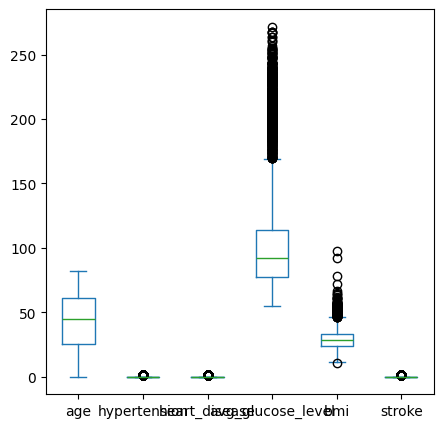

In [58]:
data.plot(kind='box')
plt.show()

# Label Encoding

In [59]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,82.0,1,0,Yes,Private,Rural,227.28,33.300000,never smoked,1
1,Female,82.0,1,0,Yes,Private,Urban,222.52,28.893237,formerly smoked,1
2,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.900000,formerly smoked,1
3,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.200000,never smoked,1
4,Female,82.0,1,0,Yes,Private,Urban,115.71,31.100000,formerly smoked,1


In [60]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [61]:
gender=enc.fit_transform(data['gender'])

In [62]:
smoking_status=enc.fit_transform(data['smoking_status'])

In [63]:
work_type=enc.fit_transform(data['work_type'])
Residence_type=enc.fit_transform(data['Residence_type'])
ever_married=enc.fit_transform(data['ever_married'])
data['gender']=gender

In [64]:
data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['work_type']=work_type

In [65]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,82.00,1,0,1,2,0,227.28,33.300000,2,1
1,0,82.00,1,0,1,2,1,222.52,28.893237,1,1
2,0,82.00,1,1,1,0,1,215.94,27.900000,1,1
3,0,82.00,1,0,1,3,1,196.92,22.200000,2,1
4,0,82.00,1,0,1,2,1,115.71,31.100000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.16,0,0,0,4,1,114.71,17.400000,0,0
5106,1,0.16,0,0,0,4,1,109.52,13.900000,0,0
5107,1,0.16,0,0,0,4,0,69.79,13.000000,0,0
5108,0,0.08,0,0,0,4,1,139.67,14.100000,0,0


In [66]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,82.00,1,0,1,2,0,227.28,33.300000,2,1
1,0,82.00,1,0,1,2,1,222.52,28.893237,1,1
2,0,82.00,1,1,1,0,1,215.94,27.900000,1,1
3,0,82.00,1,0,1,3,1,196.92,22.200000,2,1
4,0,82.00,1,0,1,2,1,115.71,31.100000,1,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.16,0,0,0,4,1,114.71,17.400000,0,0
5106,1,0.16,0,0,0,4,1,109.52,13.900000,0,0
5107,1,0.16,0,0,0,4,0,69.79,13.000000,0,0
5108,0,0.08,0,0,0,4,1,139.67,14.100000,0,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


# Spliting the data for train and test

X ---train_X,test_X 80/20
Y ---train_Y,test_Y

In [68]:
X=data.drop('stroke',axis=1)

In [69]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,82.0,1,0,1,2,0,227.28,33.300000,2
1,0,82.0,1,0,1,2,1,222.52,28.893237,1
2,0,82.0,1,1,1,0,1,215.94,27.900000,1
3,0,82.0,1,0,1,3,1,196.92,22.200000,2
4,0,82.0,1,0,1,2,1,115.71,31.100000,1


In [70]:
Y=data['stroke']

In [71]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [73]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
3831,0,25.00,0,0,0,0,0,103.15,21.0,3
5085,1,0.56,0,0,0,4,0,127.23,20.1,0
1593,1,57.00,0,0,1,3,1,83.64,29.4,3
1324,0,60.00,0,0,1,2,0,207.84,38.9,2
123,0,80.00,1,0,1,2,1,125.89,28.9,3
...,...,...,...,...,...,...,...,...,...,...
4171,0,19.00,0,0,0,3,1,84.06,24.7,2
599,1,73.00,0,1,1,0,0,70.23,28.1,2
1361,1,60.00,0,0,1,3,1,69.53,26.2,2
1547,1,57.00,0,0,1,2,1,189.57,30.7,2


In [74]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,1.4,0,0,0,4,1,129.07,20.6,0
4017,0,22.0,0,0,1,2,1,86.24,31.2,2
744,0,70.0,0,0,1,2,1,77.77,33.8,3
1799,0,54.0,0,0,1,2,1,207.79,38.6,2
2314,0,48.0,0,0,1,2,1,110.18,30.3,3
...,...,...,...,...,...,...,...,...,...,...
4795,0,5.0,0,0,0,4,0,123.49,19.5,0
4641,1,9.0,0,0,0,4,1,131.89,25.5,0
1320,0,60.0,0,0,1,2,0,230.78,40.2,2
1098,1,63.0,0,0,1,3,0,216.38,34.5,2


In [75]:
Y_train

3831    0
5085    0
1593    0
1324    0
123     1
       ..
4171    0
599     1
1361    0
1547    0
4959    0
Name: stroke, Length: 4088, dtype: int64

In [76]:
Y_test

5031    0
4017    0
744     1
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

# normalize

In [77]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.893237,1.376908,0.190411
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.698018,1.071534,0.392664
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.400000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


In [78]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [79]:
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

# Lets save the Scaler object

In [80]:
import pickle
import os

In [81]:
scaler_path=os.path.join('H:\Stroke prediction project\Models\scaler.pkl')
with open(scaler_path, 'wb') as scaler_file:
    pickle.dump(std,scaler_file)

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\prana\AppData\Local\Temp\ipykernel_5824\975143331.py:1: SyntaxWarning: invalid escape sequence '\S'
  scaler_path=os.path.join('H:\Stroke prediction project\Models\scaler.pkl')


FileNotFoundError: [Errno 2] No such file or directory: 'H:\\Stroke prediction project\\Models\\scaler.pkl'

In [ ]:
X_train_std

array([[-0.83822764,  0.52508975, -0.32887595, ..., -0.86380214,
         0.32750249,  0.58675012],
       [-0.83822764,  1.27625065, -0.32887595, ..., -0.49693827,
         0.5478543 , -0.34367443],
       [ 1.19059095, -0.53537271, -0.32887595, ..., -0.77181304,
        -0.39836227,  0.58675012],
       ...,
       [-0.83822764,  0.70183349, -0.32887595, ..., -0.36430791,
        -0.10023924, -1.27409897],
       [ 1.19059095,  0.70183349, -0.32887595, ...,  1.93039389,
         0.19788379, -1.27409897],
       [-0.83822764,  0.30416007, -0.32887595, ..., -0.96147227,
        -0.70944717,  0.58675012]])

In [ ]:
X_test_std

array([[-0.83822764, -1.021418  , -0.32887595, ...,  0.23941148,
        -1.52604504,  0.58675012],
       [-0.83822764,  0.03904446, -0.32887595, ...,  0.08252747,
         0.21084566,  1.51717466],
       [-0.83822764,  1.23206472,  3.04066013, ...,  1.92252784,
         0.35342624,  0.58675012],
       ...,
       [-0.83822764,  0.65764755, -0.32887595, ...,  0.81996973,
        -0.37243853,  1.51717466],
       [-0.83822764,  1.49718033, -0.32887595, ..., -0.68987501,
        -0.89091336, -1.27409897],
       [ 1.19059095,  1.49718033, -0.32887595, ..., -0.26117525,
         0.61266365, -1.27409897]])

# training

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [ ]:
dt.feature_importances_

array([0.04163357, 0.17634908, 0.01636484, 0.01904455, 0.01025572,
       0.03725076, 0.04566058, 0.33684931, 0.2483743 , 0.06821729])

In [ ]:
X_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [ ]:
Y_pred=dt.predict(X_test_std)

In [ ]:
Y_test

5031    0
4017    0
744     0
1799    0
2314    0
       ..
4795    0
4641    0
1320    0
1098    0
4634    0
Name: stroke, Length: 1022, dtype: int64

In [ ]:
X_test

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
5031,0,20.0,0,0,0,2,0,117.59,17.1,2
4017,0,44.0,0,0,1,2,0,110.41,30.5,3
744,0,71.0,1,0,1,2,1,194.62,31.6,2
1799,1,34.0,0,0,1,2,1,108.12,22.2,0
2314,1,82.0,0,0,1,2,1,89.83,24.7,3
...,...,...,...,...,...,...,...,...,...,...
4795,1,62.0,0,0,1,3,0,136.18,32.2,0
4641,0,45.0,0,0,1,0,0,84.99,35.4,0
1320,0,58.0,0,1,1,2,0,144.16,26.0,3
1098,0,77.0,0,0,1,2,0,75.06,22.0,0


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
ac_dt=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_dt

0.8992172211350293

In [ ]:
import joblib
model_path=os.path.join('H:\Stroke prediction project\Models\dt.sav')
joblib.dump(dt,model_path)

['H:\\Stroke prediction project\\Models\\dt.sav']

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
lr.fit(X_train_std,Y_train)

LogisticRegression()

In [ ]:
Y_pred=lr.predict(X_test_std)

In [ ]:
ac_lr=accuracy_score(Y_test,Y_pred)

In [ ]:
ac_lr

0.9471624266144814

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [ ]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [ ]:
Y_pred=knn.predict(X_test_std)

In [ ]:
ac_knn=accuracy_score(Y_test, Y_pred)

In [ ]:
ac_knn

0.9452054794520548

In [ ]:
ac_lr

0.9471624266144814

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(X_train_std, Y_train)

RandomForestClassifier()

In [ ]:
Y_pred=rf.predict(X_test)

C:\Users\Aditya Prabhakar\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [ ]:
ac_rf=accuracy_score(Y_test, Y_pred)

In [ ]:
ac_rf

0.9471624266144814

In [ ]:
ac_knn

0.9452054794520548

In [ ]:
ac_lr

0.9471624266144814

In [ ]:
ac_dt

0.8992172211350293

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv=SVC()

In [ ]:
sv.fit(X_train_std, Y_train)

SVC()

In [ ]:
Y_pred=sv.predict(X_test_std)

In [ ]:
ac_sv=accuracy_score(Y_test, Y_pred)

In [ ]:
ac_sv

0.9471624266144814

In [ ]:
ac_lr

0.9471624266144814

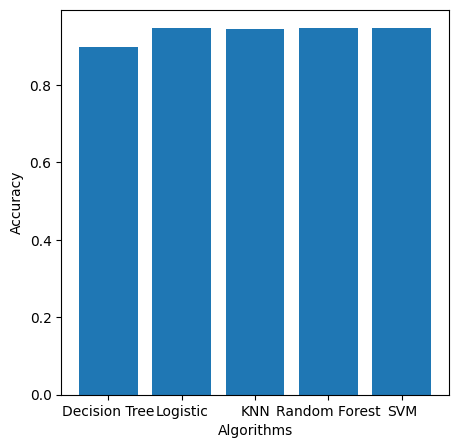

In [ ]:
plt.bar(['Decision Tree', 'Logistic', 'KNN', 'Random Forest', 'SVM'],[ac_dt, ac_lr, ac_knn, ac_rf, ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
import pickle
filename = r'H:\Stroke prediction project\finalized_model_lr.sav'
pickle.dump(lr, open(filename,'wb'))